In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()
# 1 ler şeker hastası 0 lar sağlıklı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [5]:
df.Outcome.value_counts()
# data da biraz ınbalanced durumu var.

0    500
1    268
Name: Outcome, dtype: int64

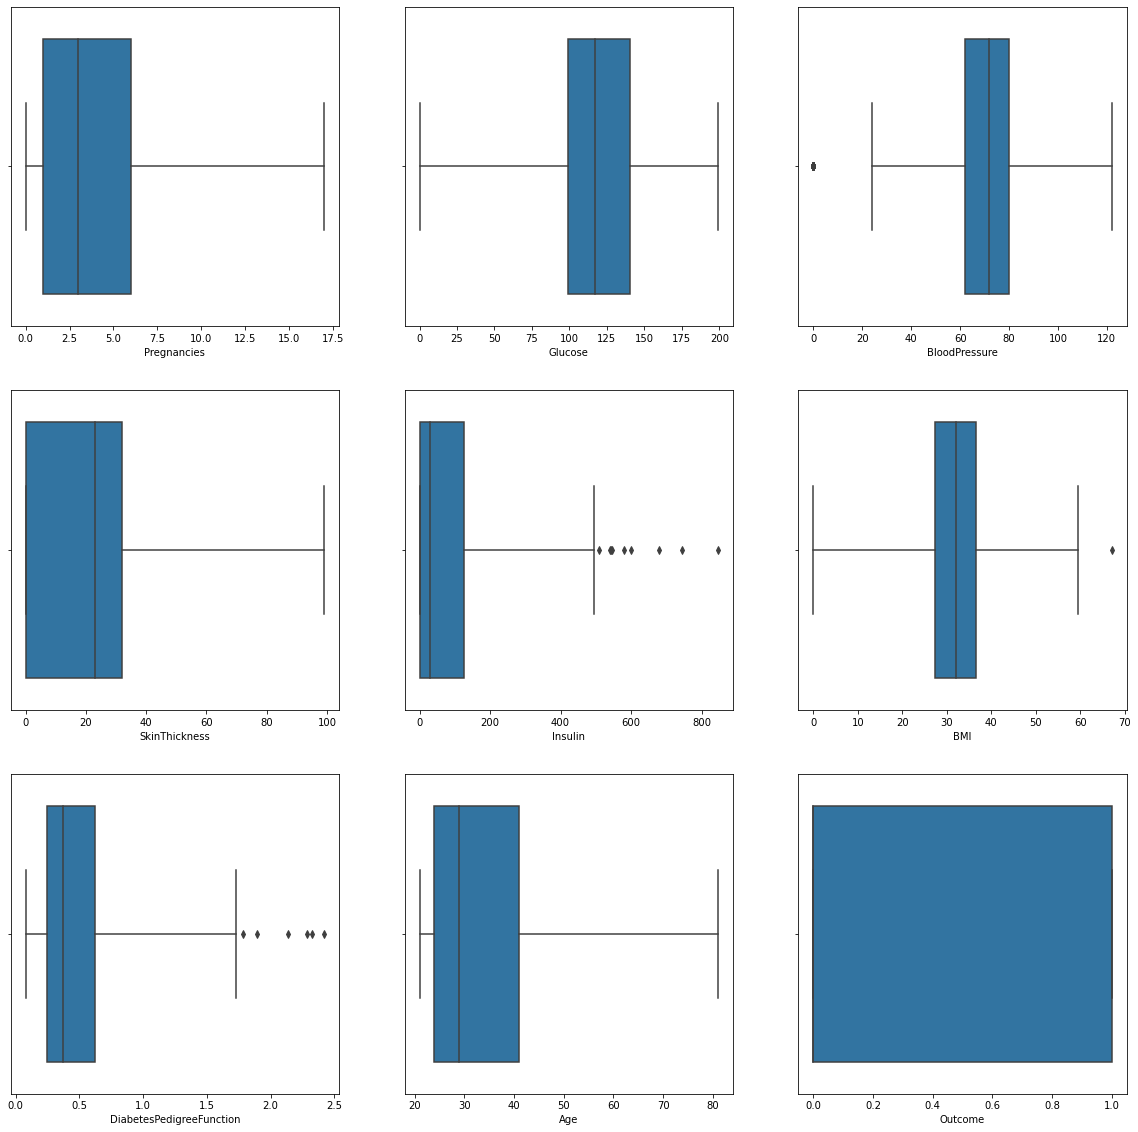

In [6]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=3.0)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-(3.0*IQR)
    ust_sinir = Q3+(3.0*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
    aykiri_alt = df[i] < alt_sinir
    aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
    df[i][aykiri_alt] = alt_sinir
    df[i][aykiri_ust] = ust_sinir

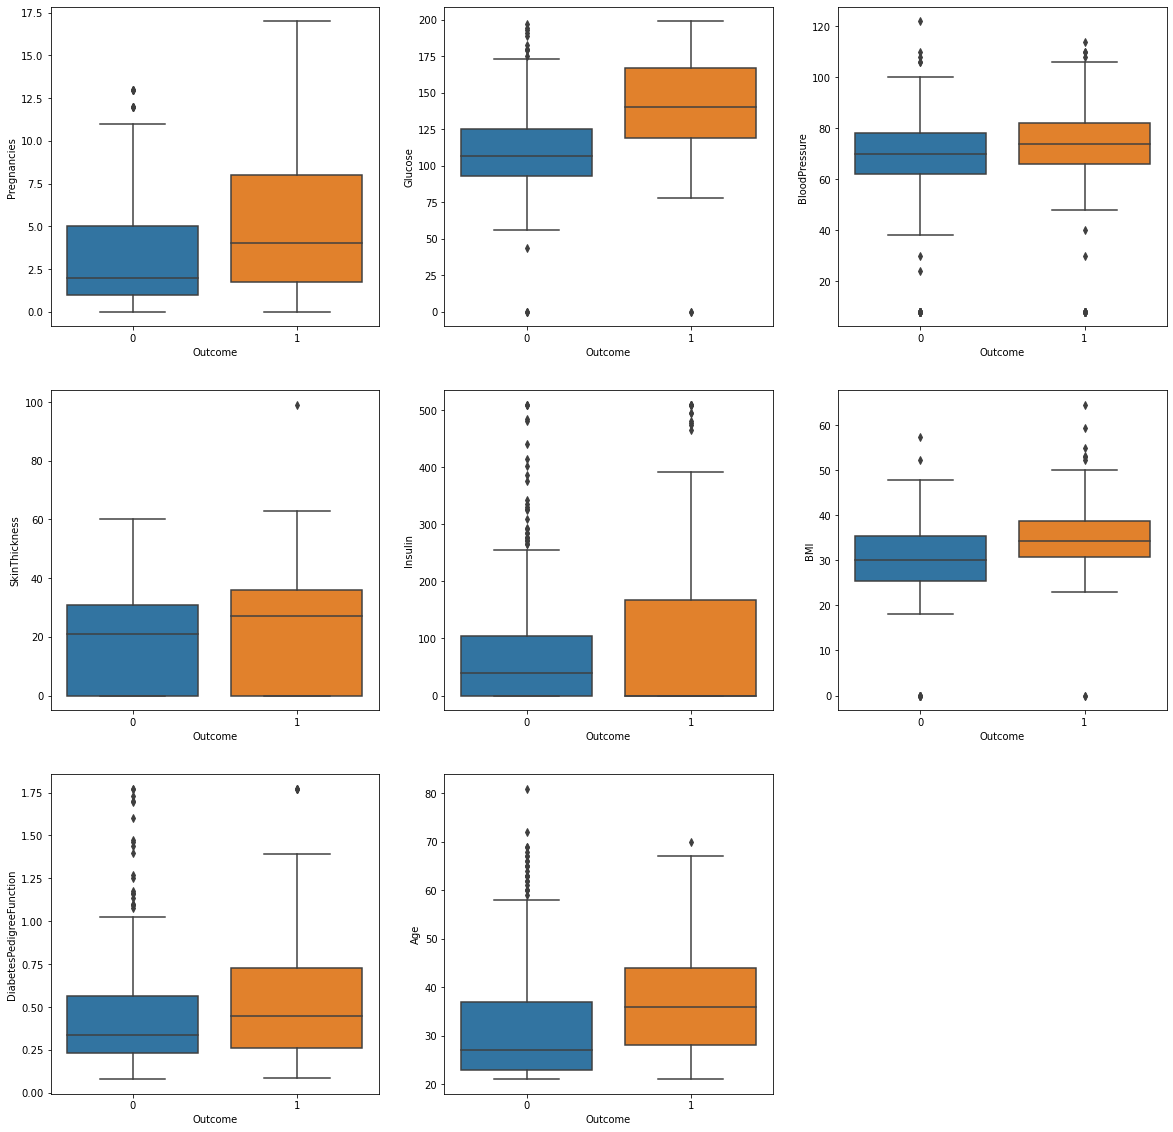

In [7]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
        # 1 hasta olanlar ile 0 hasta olmayanlar arasında ki değerlere baktık.

In [8]:
df.corr()["Outcome"].drop("Outcome").sort_values()

BloodPressure              0.074
SkinThickness              0.075
Insulin                    0.133
DiabetesPedigreeFunction   0.174
Pregnancies                0.222
Age                        0.238
BMI                        0.293
Glucose                    0.467
Name: Outcome, dtype: float64

<AxesSubplot:>

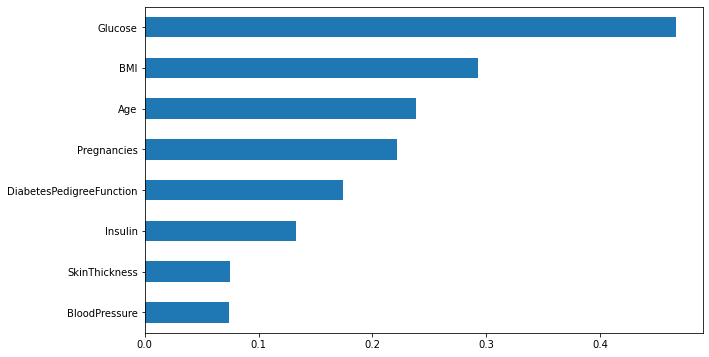

In [9]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

In [10]:
multi = df.corr()
multi[multi > 0.75]
# Multicolinarty Yok.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000


## Train Test Spilt : 

In [11]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
# stratify = y diyerek hasta olanlar ve olmayanlar arasında ki dengesizliği ortadan kaldırmak için.

### Default Values Model : 

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

### Error Metrics : 

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [17]:
precision_score(y_test, y_pred)
# 1 olan tahmin ettiklerimizi doğru bilme oranı

0.6222222222222222

In [18]:
recall_score(y_test, y_pred)
# tüm 1 olan değerleri doğru bilme başarımız.

0.5185185185185185

In [19]:
f1_score(y_test, y_pred)
# precision ve recall skor harmonik ortalaması 

0.5656565656565656

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    # bir eval metrik fonksiyonu oluşturduk. çok kullanışlı.

In [22]:
eval_metric(log_model,X_train_scaled, y_train, X_test_scaled, y_test )
# ınbalandec durumu göze çarpmakta. hafif overfitng durumu da var. skorları düzeltmeye çalışacağız.

Test_Set
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154


Train_Set
[[360  40]
 [ 87 127]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       400
           1       0.76      0.59      0.67       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614



### Cross Validate : 

In [23]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# 1 ler için test datasında fark oluştu demekki modelimiz çok sağlıklı bir tahminleme yapamamaktadır. bunlar gerçek skorlarımız

test_precision   0.745
test_recall      0.570
test_f1          0.640
test_accuracy    0.779
dtype: float64

### 0 değeri için Cross Validate :

In [24]:
from sklearn.metrics import make_scorer

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train,scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
# 0 için tahmin ettiklerimizin 0 olarak bilinme başarısı: test_precision_0 
# tüm 0 değerlerinden başarılı 0 olarak bilme başarımız : test_recall_0

test_precision_0   0.796
test_recall_0      0.890
test_f1_0          0.839
dtype: float64

### GridSearchCV Best Parametres : 

In [25]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression için önemli parametreler : 

1. Penalty : l1 = > lasso, l2 => ridge demektir.

2. C : Regressionda alpha değerinin karşılığıdır. ama farkı alpha arttıkça train ve test skorları arasında ki fark kapanır. Bias değeri büyür, c parametresinde ise küçüldükçe eklediği bias değeri azalır.

3. class_weight : eğer target classında değerler arasında dengesizlik varsa kullanılır. katsayıları kötü olanları ağırlıklandırır. yani eleman sayısı az olanı daha büyük katsayı ile çarpıp fazla olan classı yakalamaya çalışır. örneğin : 8 tane 0, 2 tane 1 olsun o zaman 1 leri 0.8 ile 0 ları 0.2 ile çarpıp yaklaştırır.

4. solver : default değeri ile çok oynamamak gerekir. eğer data çok küçükse liblinear, data çok büyükse sag ve saga olabilir. değerleri newton-cg, lbfgs, liblinear, sag, saga dır. 

In [26]:
model = LogisticRegression()

penalty = ["l1", "l2", "elasticnet"] 

C = np.logspace(-1, 5, 20) # genelde c parametresi logspace tavsiye edilir. hangi sayıların log değeri -1 ve 5 arasındadır. 100 tane sayıları bul demek.
# default olarak -1,5 tavsiye edilir.

class_weight= ["balanced", None] # data da bir dengesizlik varsa arada ki dengesizliği giderir.
# az olan 1 değeri veya 0 değerine göre daha fazla tahmin yaptırıyor ve recall değerini arttırıyoruz.
# burda 1 az onun için recall 1 değerini arttıracaktır.
solver = ["lbfgs", "liblinear", "sag", "saga"] # defaultu lbfgs dir. çoğu durum için default değer değiştirilmesi önerilmez
# çok büyük datalarda sag ve saga iyi, küçük datalarda ise liblinear tavsiye edilir.

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # skor olarak recall al dedik. default olarak 1 olarak hesaplayacak. 
                          n_jobs = -1)

In [27]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [28]:
grid_model.best_params_
# en iyi değerleri verdi. bu değerler ile tahmin deneyeceğiz.

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [29]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
# yukarıda recall skoru al dedik. biz bu data özelinde hasta olanları yani 1 değerlerini doğru bilmek istedik.

Test_Set
[[71 29]
 [13 41]]
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       100
           1       0.59      0.76      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.73       154


Train_Set
[[303  97]
 [ 54 160]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       400
           1       0.62      0.75      0.68       214

    accuracy                           0.75       614
   macro avg       0.74      0.75      0.74       614
weighted avg       0.77      0.75      0.76       614



## ROC (Receiver Operating Curve) and AUC (Area Under Curve) :  

Olasılıkları grafiksel olarak görüp best threshold değerini belirlemek : 

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

### Default Değerler ile bakalım : 

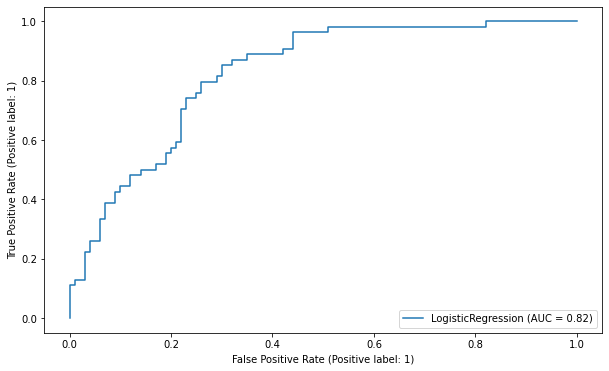

In [31]:
plot_roc_curve(log_model, X_test_scaled, y_test, pos_label=1);
# 1 ler için => 1 olarak tahmin ettiğimiz değerlerin en büyük olduğu yani recall skorunun en yüksek olduğu threshold değeri sol 
# üst köşeye en yakın olan değeri ve 0 olup 1 olarak tahmin ettiklerimizin en düşük olduğu threshol değeri lazım.

In [32]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.8242592592592592

### Grid ile parametrelere bakalım : 

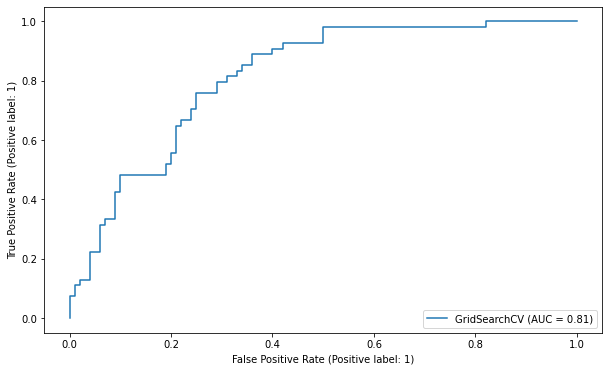

In [33]:
#y_pred_proba2 = grid_model.predict_proba(X_test_scaled)
plot_roc_curve(grid_model, X_test_scaled, y_test);

### Datamız ınbalanced olduğu için : 

In [34]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

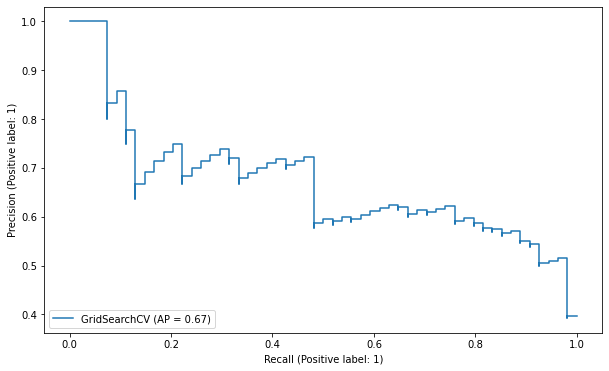

In [35]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
# dikkate alacağımız skor 0.67 olacak.

## Best Threshold : 

Default değerler ile yapılan model kullanılır.

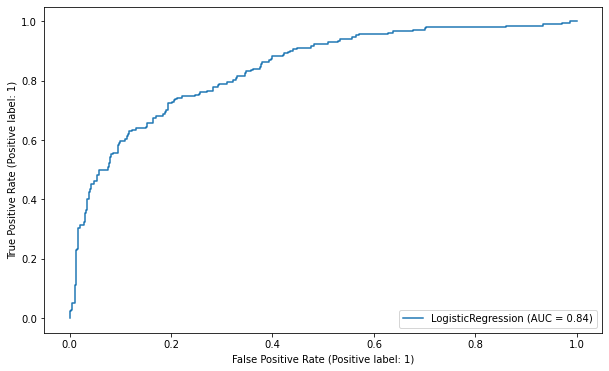

In [36]:
plot_roc_curve(log_model, X_train_scaled, y_train);
# Best thresholu train seti için belirleyeceğiz.

In [38]:
y_pred_proba_tr = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba_tr[:,1])
# en iyi parametreler ile train setinde ki 1 leri başarı ile tahmin etme durumu.
# best threshold belirlerken default parametre kullanılmalı.

0.840806074766355

In [39]:
# biz threshold değerini belirlerken data özelinde :  recall en yüksek, Fp en düşük olduğu threshold değerini bulacağız.
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba_tr[:,1])
# fp_rate = gerçek 0 lara yanlış 1 olarak bildiğimiz değerler.
# tp_rate = gerçek 1 leri doğru 1 olarak bildiğimiz değerler.
# threshold = bizim 0 ve 1 arasında olasılık değerlerimiz.
optimal_idx = np.argmax(tp_rate - fp_rate) 
# tp_rate - fp_rate değerinin en fazla olduğu indexi bulur. yani en iyi threshold değerinin bulunduğu index.
optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold # en iyi threshold değeri.

0.3481459250269427

In [41]:
average_precision_score(y_train, y_pred_proba_tr[:,1])
# precision ve recall in aritmetik ortalaması

0.7427617687820032

In [42]:
# Dengesiz veri seti olduğu için bir de burda hesapladık : 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba_tr[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3481459250269427

### En iyi Threshold ile tahminleme yapalım ama best parametreler kullanılarak : 

In [43]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
# burda optimal threshold değerimize göre yeni bir tahminleme de bulunduk. ama proba ile .
# burda ki optimal_thrershol bizim ilk log_modelden bulduğumuz thresholddur.

In [44]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
# değerlere bakılınca recall değerimiz çok güzel bir şeklide arttık. ama f1_scorumuzun en iyi değeri ile aldık.

[[56 44]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       100
           1       0.53      0.93      0.68        54

    accuracy                           0.69       154
   macro avg       0.73      0.74      0.69       154
weighted avg       0.79      0.69      0.69       154



In [45]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[213 187]
 [ 20 194]]
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       400
           1       0.51      0.91      0.65       214

    accuracy                           0.66       614
   macro avg       0.71      0.72      0.66       614
weighted avg       0.77      0.66      0.67       614



## Final Model and Model Deployment : 

In [46]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [47]:
optimal_threshold

0.3481459250269427

In [50]:
final_model = LogisticRegression(C=0.1, class_weight="balanced", penalty='l1', solver="liblinear")

In [51]:
scale = StandardScaler()

In [52]:
X_scale = scale.fit_transform(X)
final_model.fit(X_scale, y)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [55]:
prediction = pd.Series(final_model.predict_proba(X_scale)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
#predictions_proba = final_model.predict_proba(X_scale)

In [56]:
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[277 223]
 [ 24 244]]
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       500
           1       0.52      0.91      0.66       268

    accuracy                           0.68       768
   macro avg       0.72      0.73      0.68       768
weighted avg       0.78      0.68      0.68       768



In [60]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [66]:
model = LogisticRegression(C= 0.1 , class_weight= 'balanced',penalty= 'l2',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_scale), y, optimal_threshold)
# yazdığımız fonksiyon ile son skorumuzu kontrol ettik. gayet başarılı

Accuracy      68.09%  std 3.82%
Precision-1   52.83%  std 3.90%
Recall-1      88.46%  std 5.88%
F1_score-1    65.98%  std 3.10%
